In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
breast_cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [10]:
breast_cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
import pandas as pd
import numpy as np

In [12]:
cancer_input = breast_cancer_data['data']
cancer_target = breast_cancer_data['target']

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
train_input, test_input, train_target, test_target = \
train_test_split(cancer_input, cancer_target, random_state=42)

In [18]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(426, 30) (426,)
(143, 30) (143,)


In [20]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

## 랜덤포레스트

In [26]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [75]:
scores = cross_validate(rf, train_scaled, train_target,
                        return_train_score=True, n_jobs=-1)
scores

{'fit_time': array([0.17363095, 0.14869499, 0.17163658, 0.20756578, 0.2105577 ]),
 'score_time': array([0.014961  , 0.02094603, 0.01495934, 0.01999187, 0.02099037]),
 'test_score': array([0.96511628, 0.95294118, 0.98823529, 0.91764706, 0.96470588]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [76]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9577291381668946


In [77]:
# 잔여샘플 사용
rf = RandomForestClassifier(oob_score = True, n_jobs=-1, random_state=42)
rf.fit(train_scaled, train_target)
print(rf.oob_score_)

0.960093896713615


In [ ]:
# 랜덤포레스트 모델
# 학습데이터 정확도가 1.0
# 잔여샘플 모두 사용한 정확도가 0.960093896713615
# 우수한 모델이지만 약한 과대적합이 나타납니다

## 엑스트라 트리

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

In [33]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [78]:
scores = cross_validate(et, train_scaled, train_target,
                        return_train_score=True, n_jobs=-1)
scores

{'fit_time': array([0.13188362, 0.13587308, 0.13587308, 0.13037205, 0.12847877]),
 'score_time': array([0.0159564 , 0.01495957, 0.01595759, 0.02380824, 0.02376699]),
 'test_score': array([0.98837209, 0.95294118, 0.98823529, 0.94117647, 0.94117647]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [79]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9623803009575924


In [ ]:
# 엑스트라 트리 모델
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9623803009575924
# 우수한 모델이지만 약한 과대적합이 나타납니다

## 그레디언트 부스팅

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gb = GradientBoostingClassifier(random_state = 42)

In [80]:
scores = cross_validate(gb, train_scaled, train_target,
                        return_train_score=True, n_jobs=-1)
scores

{'fit_time': array([0.24195147, 0.29756474, 0.29085732, 0.2912457 , 0.29032803]),
 'score_time': array([0.        , 0.00073457, 0.        , 0.        , 0.00099802]),
 'test_score': array([0.96511628, 0.94117647, 0.94117647, 0.95294118, 0.95294118]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [81]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9506703146374831


In [ ]:
# 그레디언트 부스팅 모델
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9506703146374831
# 우수한 모델이지만 과대적합이 나타납니다

## 히스토그램 기반 그레디언트 부스팅

In [54]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [55]:
hgb = HistGradientBoostingClassifier(random_state=42)

In [82]:
scores = cross_validate(hgb, train_scaled, train_target,
                        return_train_score=True, n_jobs=-1)
scores

{'fit_time': array([0.3203156 , 0.32433224, 0.31394982, 0.31627226, 0.30955553]),
 'score_time': array([0.00099659, 0.00200987, 0.003263  , 0.00401735, 0.0005157 ]),
 'test_score': array([0.96511628, 0.95294118, 0.97647059, 0.96470588, 0.94117647]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [83]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9600820793433653


In [ ]:
# 히스토그램 기반 그레디언트 부스팅 모델
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9600820793433653
# 우수한 모델이지만 약한 과대적합이 나타납니다

## XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb = XGBClassifier(tree_method='hist', random_state=42)

In [84]:
scores = cross_validate(xgb, train_scaled, train_target, \
                        return_train_score = True, n_jobs = -1)
scores

{'fit_time': array([0.1301887 , 0.12115836, 0.12817836, 0.13001561, 0.12016082]),
 'score_time': array([0.00221491, 0.        , 0.00201035, 0.00801468, 0.00702   ]),
 'test_score': array([0.97674419, 0.94117647, 0.97647059, 0.95294118, 0.94117647]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [85]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9577017783857729


In [ ]:
# XGBoost
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9577017783857729
# 우수한 모델이지만 과대적합이 나타납니다

## LightGBM

In [62]:
from lightgbm import LGBMClassifier

In [63]:
lg = LGBMClassifier(random_state=42)

In [86]:
scores = cross_validate(lg, train_scaled, train_target, \
                       return_train_score = True, n_jobs=-1)
scores

{'fit_time': array([0.06400967, 0.07878852, 0.06582403, 0.07267475, 0.072891  ]),
 'score_time': array([0.00099707, 0.00099683, 0.00099802, 0.00099826, 0.0009973 ]),
 'test_score': array([0.96511628, 0.94117647, 0.98823529, 0.96470588, 0.96470588]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [87]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9647879616963065


In [ ]:
# LightGBM
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9647879616963065
# 우수한 모델이지만 약한 과대적합이 나타납니다

## 결정트리 모델

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt = DecisionTreeClassifier(random_state = 42)

In [98]:
scores = cross_validate(dt, train_scaled, train_target, \
                       return_train_score = True, n_jobs=-1)
scores

{'fit_time': array([0.01586461, 0.01196718, 0.01296401, 0.01297188, 0.01396513]),
 'score_time': array([0.00121307, 0.        , 0.00099683, 0.        , 0.00099754]),
 'test_score': array([0.95348837, 0.91764706, 0.92941176, 0.95294118, 0.88235294]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [99]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

1.0
0.9271682626538986


In [ ]:
# 결정트리 모델
# 학습데이터 정확도가 1.0
# 테스트데이터 정확도가 0.9271682626538986
# 우수한 모델이지만 과대적합이 나타납니다

## 확률적 경사 하강법

In [101]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [116]:
sc = SGDClassifier(loss='log_loss', random_state=42)

df_score = pd.DataFrame()
train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 150회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 150):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    df_temp = pd.DataFrame({'train_score' : [sc.score(train_scaled, train_target)], \
                            'test_score' : [sc.score(test_scaled, test_target)], \
                            'score_gap' : [(sc.score(train_scaled, train_target) - sc.score(test_scaled, test_target))]})
    df_score = pd.concat([df_score, df_temp])

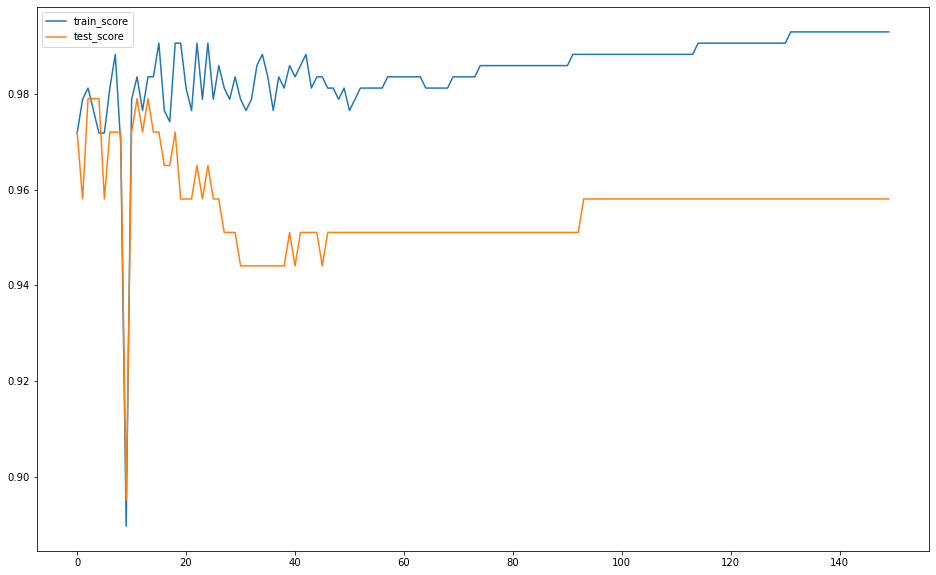

In [117]:
plt.figure(figsize=(16,10))
plt.plot(train_score, label='train_score')
plt.plot(test_score, label='test_score')
plt.legend()
plt.show()

In [118]:
df_score

,train_score,test_score,score_gap
0,0.971831,0.972028,-0.000197
0,0.978873,0.958042,0.020831
0,0.981221,0.979021,0.002200
0,0.976526,0.979021,-0.002495
0,0.971831,0.979021,-0.007190
...,...,...,...
0,0.992958,0.958042,0.034916
0,0.992958,0.958042,0.034916
0,0.992958,0.958042,0.034916
0,0.992958,0.958042,0.034916


## 로지스틱회귀 이진분류

In [67]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(random_state = 42)

In [88]:
scores = cross_validate(lr, train_scaled, train_target, \
                       return_train_score = True, n_jobs=-1)
scores

{'fit_time': array([0.00650573, 0.01062846, 0.00663805, 0.01162457, 0.00742388]),
 'score_time': array([0.00067878, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.98837209, 0.96470588, 1.        , 0.96470588, 0.95294118]),
 'train_score': array([0.98529412, 0.98826979, 0.98240469, 0.9941349 , 0.98826979])}

In [89]:
print(scores['train_score'].mean())
print(scores['test_score'].mean())

0.9876746593065379
0.9741450068399453


In [96]:
lr.fit(train_scaled, train_target)
print(len(test_target))
print(sum(lr.predict(test_scaled) == test_target))

143
140


In [ ]:
# 결론
# 학습데이터와 테스트데이터의 정확도 차이가 가장 작은 로지스틱회귀 이진분류 모델 선택
# 학습데이터 정확도 0.9876746593065379
# 테스트데이터 정확도 0.9741450068399453